In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip -q "/content/gdrive/MyDrive/Colab/Assignment/Data/archive.zip" -d /content/Data

In [ ]:
GDRIVE_PROJ_DIR = "/content/gdrive/MyDrive/Colab/Assignment"
BASE_DATA_DIR = "/content/Data/tiny-imagenet-200"

TRAIN_DIR = os.path.join(BASE_DATA_DIR, 'train')
VAL_DIR = os.path.join(BASE_DATA_DIR,'val')

In [ ]:
import os

#Check if there are any multiclass labels in sub folders
class_folders = os.listdir(TRAIN_DIR)
for folder in class_folders:
    sub_folder = os.listdir(os.path.join(TRAIN_DIR, folder))
    if len(sub_folder) > 2:
        print("Found one anomoly", sub_folder)

In [48]:
import json

# Create mapping from encoded class string to class name
label_mapping = {}
labels_in_train = os.listdir(TRAIN_DIR)

with open(os.path.join(BASE_DATA_DIR, 'words.txt'), 'r') as file:
    for line in file:
        info = line.split('\t')
        if info[0] in labels_in_train:
            label_mapping[info[0]] = info[1].strip()
with open(os.path.join(GDRIVE_PROJ_DIR, 'label_mapping.json'), 'w') as file:
    json.dump(label_mapping, file)

In [55]:
# Creating train.csv to be used for training

data = {
    'image_path':[],
    'class_code':[],
    'class_name':[]
}

for class_code in class_folders:
    images = os.listdir(os.path.join(TRAIN_DIR, class_code, 'images'))
    for image in images:
        data['image_path'].append(os.path.join(class_code,'images', image))
        data['class_code'].append(class_code)
        data['class_name'].append(label_mapping[class_code])

In [82]:
import pandas as pd 

train_csv = pd.DataFrame(data)

train_csv = train_csv.sample(frac=1, random_state=27).reset_index(drop=True)
train_csv.to_csv(os.path.join(GDRIVE_PROJ_DIR, 'train.csv'), index=False)
train_csv.head()

,image_path,class_code,class_name
0,n03126707/images/n03126707_344.JPEG,n03126707,crane
1,n02437312/images/n02437312_328.JPEG,n02437312,"Arabian camel, dromedary, Camelus dromedarius"
2,n02113799/images/n02113799_124.JPEG,n02113799,standard poodle
3,n03980874/images/n03980874_261.JPEG,n03980874,poncho
4,n03649909/images/n03649909_208.JPEG,n03649909,"lawn mower, mower"


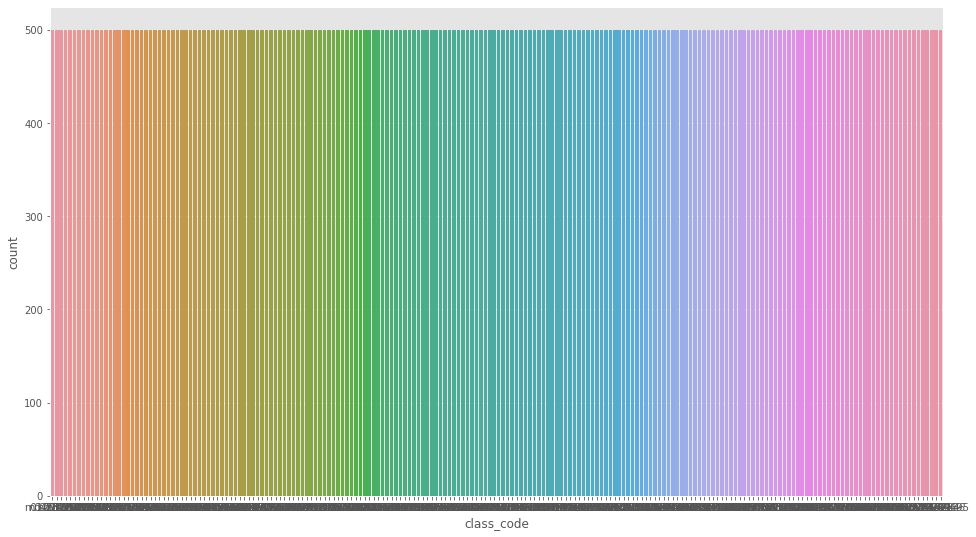

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if there is imbalance in the classes
fig, ax = plt.subplots(figsize=(16, 9))
sns.countplot(x='class_code', data=train_csv, ax=ax)

It is hard to see becuase of 200 classes but It seems every class has 500 examples and there isn't any imbalance int the dataset